In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip.qip.models.circuitnoise import *
from qutip.operators import destroy, qeye, sigmax
from qutip.qip.models.circuitprocessor import CircuitProcessor
from qutip.states import basis
from qutip.metrics import fidelity
from qutip.qobj import ptrace
from qutip.tensor import tensor
from qutip.qip import qubit_states
from qutip.qobjevo import QobjEvo

## Setup

In [2]:
N = 2
a1 = tensor(destroy(2), qeye(2))
a2 = tensor(qeye(2), destroy(2))
rho0 = qubit_states(2,[1,1])
tlist = np.arange(0.,2.,0.01)+0.01

## Create a noise object
Define the decoherence on the qubit with index 1

In [3]:
dec_noise = DecoherenceNoise(c_ops = destroy(2), targets=1)


In [4]:
dec_noise.get_qobjlist(N, tlist)

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 0.]]]

## Evolution with noise

In [5]:
proc = CircuitProcessor(N)
proc.tlist = tlist

In [6]:
proc.add_noise(dec_noise)
result=proc.run_state(rho0=rho0)

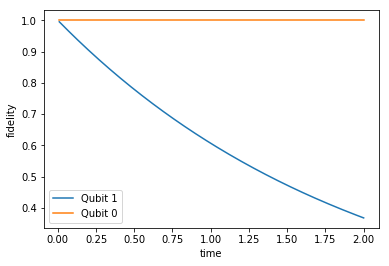

In [7]:
fig, ax = plt.subplots(1)
ax.plot(tlist,[fidelity(ptrace(rho0,1), ptrace(result.states[i],1)) for i in range(len(result.states))][1:], label="Qubit 1")
ax.plot(tlist,[fidelity(ptrace(rho0,0), ptrace(result.states[i],0)) for i in range(len(result.states))][1:], label="Qubit 0")
ax.set_ylabel("fidelity")
ax.set_xlabel("time")
plt.legend()
plt.show()

## Other types of noise
### White noise
The white noise creates an array of gaussian random numbers at each time in the `tlist`. The operators can either be given in the class. If not, it will add a gaussian noise to all the operators in the circuit processor

In [8]:
white_noise = WhiteNoise(mean=0., std=0.5, ops=[sigmax()])
noise_qobj = white_noise.get_qobjevo(N=N, tlist=tlist)

The noise operator and noise signal:

In [9]:
noise_qobj.ops[0].qobj

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

Text(0.5, 0, 't')

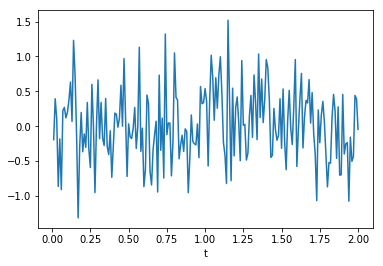

In [13]:
plt.plot(tlist, noise_qobj.ops[0].coeff);
plt.xlabel("time")
plt.ylabel